# Cleaning tool for DEALS in Hubspot CRM

# Data Gathering

In [865]:
# importing libraries I will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [866]:
# importing my dataset
crm_deals = pd.read_csv('toutes-les-transactions.csv')
crm_deals.shape

(7352, 127)

In [867]:
# we have 127 columns, we set up our tool to be able to check them all without slicing our dataframe
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [868]:
# checking our data
crm_deals.head()

,Deal ID,Techno (L33T),Pays / Job Country,Numéro de TVA (si entreprise basée à l'etranger),Closed Won Reason,Tiering,Annual contract value,Last Modified Date,Montant du CA pour le propriétaire du deal / Turnover for the deal owner,ID Répondant Scan,Nom de facturation de l'entreprise (si différent),Montant du CA pour l'apporteur d'affaires,Restitution orale faite,Salaire fixe final (en K€) / Final fixed salary,Pipeline,Croissance / Compétences (Growth / Competencies),Weighted amount in company currency,Motif de Refus / Reason for refusal,Next step,Nom du candidat placé / Name of candidate placed,Nom de l'OPCO du client,Campaign of last booking in meetings tool,(ATTENTION - NE METTRE QUE L'ADRESSE MAIL) Contact à qui envoyer la facture,Forecast probability,Repeat : Outbound VS Inbound,ScanRH_Intitulé_Poste,Close Date,Deal Type,Situation par rapport aux OPCO,Number of times contacted,Number of Sales Activities,Date du placement / Date of placement,Réactivité du client / Client reactivity,Currency,Deal Split Added,Original Source Type,Forecast amount,% du contract / % of the contract,Dupliquer le job ? / Duplicate the job?,Origine du lead (SPINE),Medium of last booking in meetings tool,Create Date,Date du prochain rendez-vous (SPINE),Coach associé au recrutement / Coach associated to the hiring,Date of last meeting booked in meetings tool,Score prévisionnel de l'opport,Linkedin de l'entreprise,Remplacement / Replacement,Type d'accompagnement proposé (SPINE),Statut de la facture d'acompte,Date d'envoi de la facture,Numéro RCS de l'entreprise,Catégorie d'accompagnement (CA),Annual recurring revenue,Salaire variable estimé (en K€) / Estimated variable salary,Lead Delivery,Personne de la team qui a fait la passe (si existant),Echéance de paiement si spécifique,Salaire variable final (en K€) / Final variable salary,Scan - Motif du gain de la transaction,Date d'échéance de la facture d'acompte,Concurrence sur le poste ? / Competition on this position?,Poste du contact ayant rempli Scan RH,bo_job_id,Deal owner,Last Activity Date,Next Activity Date,Source of last booking in meetings tool,Owner Assigned Date,Recrutement en cours ? / Current recruitment ongoing ? (L'entreprise a-t-elle des offres en ligne - avec ou sans nous / with or without us),Nombre de participants à l'atelier / la formation,Lieu d'immatriculation du RCS,Deal Stage,Nombre d'années d'expériences / Years of Experience (jobs),Date d'envoi de la facture d'acompte,Exclusivité / Exclusivity,Number of Associated Contacts,Catégorie métier du job / Job category,Original Source Data 1,Weighted amount,Total contract value,Raison de la perte du job / Job loss reason,Statut de la facturation,Original Source Data 2,Transaction venant de Scan RH,Last Contacted,Facturation contact created in Dendreo,Politique de Remote ?,Deal probability,HubSpot Team,ScanRH_Taille,Must-haves,Montant du CA pour le coach associé / Turnover for the coach,Raison de la perte du deal / Reason of deal loss,Deal Name,Dates de la prestation,Date du dernier jour de la prestation,Amount,La boîte attire-t-elle nos candidats ? / Does the startup attract our candidates?,Nombre de jours de préparation réalisée,Priority,Monthly recurring revenue,Provenance du lead / Lead Source (Convention de recrutement),Salaire fixe estimé (en K€) / Fixed salary estimated,Type de contrat. / Contract type,New / Repeat,Montant du CA à facturer pour l'acompte,Date du 1er Rendez-vous / 1st meeting date (Convention de recrutement / Account Management),Métier / Type of job (jobs),Capacité d’Ignition à répondre au besoin(métier/candidats) ? / Ignition capacity to help,Date du 1er jour de la prestation,Prospection (Convention de recrutement / Account Management),Montant du CA à facturer pour le solde,Deal Description,Détails du calcul,Nombre de jours d'animation réalisés ou à réaliser,Forecast category,Adresse de facturation / Invoicing address,Nombre d'animateurs et co-animateurs Ignition,Amount in company currency,Urgence du recrutement /

In [869]:
crm_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 127 entries, Deal ID to Associated Contacts
dtypes: bool(1), float64(34), int64(1), object(91)
memory usage: 7.1+ MB


In [870]:
crm_deals.dtypes

Deal ID                                                                                                                                          int64
Techno (L33T)                                                                                                                                   object
Pays / Job Country                                                                                                                              object
Numéro de TVA (si entreprise basée à l'etranger)                                                                                                object
Closed Won Reason                                                                                                                               object
Tiering                                                                                                                                         object
Annual contract value                                                                         

# Data Cleaning - Part 1 : full dataframe

Let'start by cleaning column names :

In [871]:
# Turning column names into lower cases
crm_deals.columns = list(map(lambda x: x.lower(), crm_deals.columns))
crm_deals.columns

Index(['deal id', 'techno (l33t)', 'pays / job country',
       'numéro de tva (si entreprise basée à l'etranger)', 'closed won reason',
       'tiering', 'annual contract value', 'last modified date',
       'montant du ca pour le propriétaire du deal / turnover for the deal owner',
       'id répondant scan',
       ...
       'adresse de facturation / invoicing address',
       'nombre d'animateurs et co-animateurs  ignition',
       'amount in company currency',
       'urgence du recrutement / emergency of the recruitment',
       'commentaire pour hiba',
       'vient du formulaire lead entrant (convention recrutement) / is a inbound lead?',
       'associated company id', 'associated company', 'associated contact ids',
       'associated contacts'],
      dtype='object', length=127)

In [872]:
# Deleting not needed informations between parenthesis


# %%writefile functions.py -> don't work
# then call the function in other notebooks :
# from functions import clean_dealstage


import re

def clean_parenthesis(x) :
    x = re.sub(r"\([^()]*\)", "", x)
    x = x.rstrip()
    return x

crm_deals.columns = list(map(clean_parenthesis, crm_deals.columns))
crm_deals.columns

Index(['deal id', 'techno', 'pays / job country', 'numéro de tva',
       'closed won reason', 'tiering', 'annual contract value',
       'last modified date',
       'montant du ca pour le propriétaire du deal / turnover for the deal owner',
       'id répondant scan',
       ...
       'adresse de facturation / invoicing address',
       'nombre d'animateurs et co-animateurs  ignition',
       'amount in company currency',
       'urgence du recrutement / emergency of the recruitment',
       'commentaire pour hiba',
       'vient du formulaire lead entrant  / is a inbound lead?',
       'associated company id', 'associated company', 'associated contact ids',
       'associated contacts'],
      dtype='object', length=127)

In [873]:
# Removing the part after the "/" :
def clean_doubles(x) :
    split_str = x.split("/", 1)
    x = split_str[0]
    x = x.rstrip()
    return x

In [874]:
crm_deals.columns = list(map(clean_doubles, crm_deals.columns))
crm_deals.columns

Index(['deal id', 'techno', 'pays', 'numéro de tva', 'closed won reason',
       'tiering', 'annual contract value', 'last modified date',
       'montant du ca pour le propriétaire du deal', 'id répondant scan',
       ...
       'adresse de facturation',
       'nombre d'animateurs et co-animateurs  ignition',
       'amount in company currency', 'urgence du recrutement',
       'commentaire pour hiba', 'vient du formulaire lead entrant',
       'associated company id', 'associated company', 'associated contact ids',
       'associated contacts'],
      dtype='object', length=127)

In [875]:
# Replacing white spaces by underscores :
def clean_underscore(x) :
    if " " in x :
        return x.replace(" ", "_")
    else : 
        return x

In [876]:
crm_deals.columns = list(map(clean_underscore, crm_deals.columns))
crm_deals.columns

Index(['deal_id', 'techno', 'pays', 'numéro_de_tva', 'closed_won_reason',
       'tiering', 'annual_contract_value', 'last_modified_date',
       'montant_du_ca_pour_le_propriétaire_du_deal', 'id_répondant_scan',
       ...
       'adresse_de_facturation',
       'nombre_d'animateurs_et_co-animateurs__ignition',
       'amount_in_company_currency', 'urgence_du_recrutement',
       'commentaire_pour_hiba', 'vient_du_formulaire_lead_entrant',
       'associated_company_id', 'associated_company', 'associated_contact_ids',
       'associated_contacts'],
      dtype='object', length=127)

In [877]:
# Replacing ' by underscore :
def clean_apostrophe(x) :
    if "'" in x :
        return x.replace("'", "_")
    else : 
        return x

In [878]:
crm_deals.columns = list(map(clean_apostrophe, crm_deals.columns))
crm_deals.columns

Index(['deal_id', 'techno', 'pays', 'numéro_de_tva', 'closed_won_reason',
       'tiering', 'annual_contract_value', 'last_modified_date',
       'montant_du_ca_pour_le_propriétaire_du_deal', 'id_répondant_scan',
       ...
       'adresse_de_facturation',
       'nombre_d_animateurs_et_co-animateurs__ignition',
       'amount_in_company_currency', 'urgence_du_recrutement',
       'commentaire_pour_hiba', 'vient_du_formulaire_lead_entrant',
       'associated_company_id', 'associated_company', 'associated_contact_ids',
       'associated_contacts'],
      dtype='object', length=127)

In [879]:
# Finding out which columns to drop :
(crm_deals.isna().sum()) / (crm_deals.shape[0])

deal_id                                               0.000000
techno                                                0.965860
pays                                                  0.681583
numéro_de_tva                                         0.725109
closed_won_reason                                     0.996328
tiering                                               0.602285
annual_contract_value                                 0.939880
last_modified_date                                    0.000000
montant_du_ca_pour_le_propriétaire_du_deal            0.914581
id_répondant_scan                                     0.974565
nom_de_facturation_de_l_entreprise                    0.681991
montant_du_ca_pour_l_apporteur_d_affaires             0.992655
restitution_orale_faite                               0.985174
salaire_fixe_final                                    0.968988
pipeline                                              0.000000
croissance                                            0

In [880]:
# Creating a dataframe with the % of missing values for each columns
nulls_col = pd.DataFrame(round(crm_deals.isna().sum()/len(crm_deals),4)*100).reset_index()
nulls_col.columns = ['header_name', 'percent_nulls']
nulls_col.head()

,header_name,percent_nulls
0,deal_id,0.00
1,techno,96.59
2,pays,68.16
3,numéro_de_tva,72.51
4,closed_won_reason,99.63


In [881]:
nulls_col.percent_nulls.median()

85.87

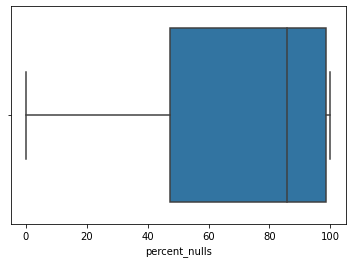

In [882]:
sns.boxplot(x = nulls_col.percent_nulls)
plt.show()

In [883]:
# columns to drop :
columns_drop = nulls_col[nulls_col['percent_nulls']>80]['header_name']  
crm_deals = crm_deals.drop(columns_drop, axis=1)
crm_deals.shape

(7352, 61)

In [884]:
crm_deals.head()

,deal_id,pays,numéro_de_tva,tiering,last_modified_date,nom_de_facturation_de_l_entreprise,pipeline,croissance,weighted_amount_in_company_currency,_contact_à_qui_envoyer_la_facture,forecast_probability,close_date,number_of_times_contacted,number_of_sales_activities,réactivité_du_client,currency,deal_split_added,original_source_type,forecast_amount,_%_du_contract,create_date,score_prévisionnel_de_l_opport,remplacement,numéro_rcs_de_l_entreprise,concurrence_sur_le_poste_?,bo_job_id,deal_owner,last_activity_date,owner_assigned_date,lieu_d_immatriculation_du_rcs,deal_stage,nombre_d_années_d_expériences,number_of_associated_contacts,catégorie_métier_du_job,original_source_data_1,weighted_amount,raison_de_la_perte_du_job,statut_de_la_facturation,original_source_data_2,transaction_venant_de_scan_rh,last_contacted,deal_probability,hubspot_team,deal_name,amount,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,date_du_1er_rendez-vous,métier,capacité_d’ignition_à_répondre_au_besoin_?,prospection,forecast_category,adresse_de_facturation,amount_in_company_currency,urgence_du_recrutement,vient_du_formulaire_lead_entrant,associated_company_id,associated_company,associated_contact_ids,associated_contacts
0,9008554681,NaN,NaN,NaN,2022-05-25 18:22,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 18:17,NaN,NaN,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 18:17,0.0,NaN,NaN,NaN,NaN,Chloé Marchand,NaN,2022-05-25 18:21,NaN,Rendez-vous planifié / Meeting booked,NaN,1.0,NaN,CONTACTS,NaN,NaN,NaN,userId:28478318,Non,NaN,0.4,Les Merines,Escape - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,8058317960,Escape,9515251,Tristan Kalos (tristan.kalos@escape.ua)
1,9007207702,NaN,NaN,NaN,2022-05-25 17:34,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 17:30,0.0,1.0,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 17:30,0.0,NaN,NaN,NaN,NaN,Charlotte GERAUD,NaN,2022-05-25 17:30,NaN,Rendez-vous planifié / Meeting booked,NaN,1.0,NaN,CONTACTS,NaN,NaN,NaN,userId:44492086,Non,NaN,0.4,Les MéMER,CHICHE - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,2022-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,8781674400,CHICHE,12106801,Coralie Honajzer (coralie@onestchiche.com)
2,9007083660,NaN,NaN,Tiède,2022-05-25 17:18,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 17:17,NaN,NaN,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 17:17,0.0,NaN,NaN,NaN,NaN,Charlotte GERAUD,NaN,2022-05-25 17:17,NaN,Rendez-vous planifié / Meeting booked,NaN,0.0,NaN,CONTACTS,NaN,NaN,NaN,userId:44492086,Non,NaN,0.4,Les MéMER,Smileinthelight - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,2022-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,8680841808,Smileinthelight,NaN,NaN
3,9005498498,NaN,NaN,Tiède,2022-05-25 15:15,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 15:14,NaN,NaN,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 15:14,0.0,NaN,NaN,NaN,NaN,Pauline de JENLIS,NaN,2022-05-25 15:14,NaN,Rendez-vous planifié / Meeting booked,NaN,0.0,NaN,CONTACTS,NaN,NaN,NaN,CRM_UI,Non,NaN,0.4,Les Merines,BOTdesign - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,5211719455,BOTdesign,NaN,NaN
4,9005302272,NaN,NaN,NaN,2022-05-25 15:48,NaN,Scan RH,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,False,Offline Sources,NaN,NaN,2022-05-25 14:36,0.0,NaN,NaN,NaN,NaN,Antoine Delaporte,2022-05-25 15:48,2022-05-25 15:30,NaN,Rendez-vous à planifier,NaN,1.0,NaN,INTEGRATION,NaN,NaN,NaN,25200,Oui,2022-05-25 15:48,0.5,Maxiteam,Telequid - Scan RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12115251,frédéric.bruel@yuzzitpro.com


In [885]:
(crm_deals.isna().sum()) / (crm_deals.shape[0])

deal_id                                       0.000000
pays                                          0.681583
numéro_de_tva                                 0.725109
tiering                                       0.602285
last_modified_date                            0.000000
nom_de_facturation_de_l_entreprise            0.681991
pipeline                                      0.000000
croissance                                    0.605822
weighted_amount_in_company_currency           0.474021
_contact_à_qui_envoyer_la_facture             0.679951
forecast_probability                          0.367111
close_date                                    0.159276
number_of_times_contacted                     0.242655
number_of_sales_activities                    0.242655
réactivité_du_client                          0.727693
currency                                      0.220484
deal_split_added                              0.000000
original_source_type                          0.026795
forecast_a

In [886]:
# Are there any duplicate rows?
crm_deals = crm_deals.drop_duplicates()
crm_deals.shape
# There aren't any duplicates

(7352, 61)

In [887]:
# Other columns will be useless for our analysis, let's drop them. Column concerned =
# numéro_de_tva
# nom_de_facturation_de_l'entreprise
# _contact_à_qui_envoyer_la_facture
# numéro_rcs_de_l'entreprise
# lieu_d_immatriculation_du_rcs
# statut_de_la_facturation
# adresse_de_facturation
# forecast_probability (just a proba set up by the sales)
# owner_assigned_date
# currency (all in €)
# deal_split_added : all false

In [888]:
crm_deals = crm_deals.drop(['numéro_de_tva','nom_de_facturation_de_l_entreprise','_contact_à_qui_envoyer_la_facture', 
                            'numéro_rcs_de_l_entreprise', 'statut_de_la_facturation', 'adresse_de_facturation', 
                            'lieu_d_immatriculation_du_rcs', 'forecast_probability', 'owner_assigned_date', 'currency',
                           'deal_split_added', 'prospection'], axis=1)

In [889]:
crm_deals.shape

(7352, 49)

In [890]:
# Exploring data through deal stage :
crm_deals['deal_stage'].unique()

array(['Rendez-vous planifié / Meeting booked', 'Rendez-vous à planifier',
       'Actif / Active', 'Besoin pré-identifié / RDV à planifier',
       'Contrat envoyé / Contract sent', 'Gagné / Won - Encaissé / Paid',
       'Gagné / Won', 'Qualification en cours',
       'Gagné - Convention signée / Won - Contract signed',
       'Rendez-vous effectué / Meeting done - En discussions / In discussion',
       'Gagné - Facture envoyée', 'Gagné - Facture encaissée',
       'Contrat / Devis signé', 'Propal envoyée',
       'Gagné / Won - Facture envoyée / Invoice sent', 'Stand-by',
       'Perdu', 'Besoin identifié - Rendez-vous à booker',
       'Proposition commerciale envoyée', 'Perdu / Lost', 'Fermé - Perdu',
       'Rendez-vous planifié',
       'Gagné / Won - Infos de facturation renseignées / Invoicing info filled',
       'Fermé perdu', 'Devis envoyé', 'Contrat / Devis envoyé',
       'Gagné - Encaissé', 'Devis signé - Gagné',
       'Gagné - 2e facture envoyée', 'Prestation terminée

In [891]:
# Creating a new column based on deal stage :
def clean_dealstage(x) :
    if 'Gagné' in x :
        return "Won"
    if 'signé' in x :
        return "Won"
    if 'Prestation' in x :
        return "Won"
    elif 'Perdu' in x :
        return "Lost"
    elif 'Fermé' in x :
        return "Lost"
    else :
        return "On-going"

In [892]:
crm_deals['status'] = crm_deals['deal_stage'].apply(clean_dealstage)
crm_deals['status'].value_counts()

Lost        2990
Won         2656
On-going    1706
Name: status, dtype: int64

In [893]:
# Cleaning dates :
print("Data type for last_modified_date is :", crm_deals['last_modified_date'].dtypes)
print("Data type for close_date is :", crm_deals['close_date'].dtypes)
print("Data type for create_date is :", crm_deals['create_date'].dtypes)
print("Data type for last_activity_date is :", crm_deals['last_activity_date'].dtypes)
print("Data type for last_contacted is :", crm_deals['last_contacted'].dtypes)
print("Data type for date_du_1er_rendez-vous is :", crm_deals['date_du_1er_rendez-vous'].dtypes)

Data type for last_modified_date is : object
Data type for close_date is : object
Data type for create_date is : object
Data type for last_activity_date is : object
Data type for last_contacted is : object
Data type for date_du_1er_rendez-vous is : object


In [894]:
def clean_dateformat(x) :
    return pd.to_datetime(x, errors = 'coerce')

crm_deals['last_modified_date'] = list(map(clean_dateformat, crm_deals['last_modified_date']))
crm_deals['close_date'] = list(map(clean_dateformat, crm_deals['close_date']))
crm_deals['create_date'] = list(map(clean_dateformat, crm_deals['create_date']))
crm_deals['last_activity_date'] = list(map(clean_dateformat, crm_deals['last_activity_date']))
crm_deals['last_contacted'] = list(map(clean_dateformat, crm_deals['last_contacted']))
crm_deals['date_du_1er_rendez-vous'] = list(map(clean_dateformat, crm_deals['date_du_1er_rendez-vous']))

In [895]:
print("Data type for last_modified_date is :", crm_deals['last_modified_date'].dtypes)
print("Data type for close_date is :", crm_deals['close_date'].dtypes)
print("Data type for create_date is :", crm_deals['create_date'].dtypes)
print("Data type for last_activity_date is :", crm_deals['last_activity_date'].dtypes)
print("Data type for last_contacted is :", crm_deals['last_contacted'].dtypes)
print("Data type for date_du_1er_rendez-vous is :", crm_deals['date_du_1er_rendez-vous'].dtypes)

Data type for last_modified_date is : datetime64[ns]
Data type for close_date is : datetime64[ns]
Data type for create_date is : datetime64[ns]
Data type for last_activity_date is : datetime64[ns]
Data type for last_contacted is : datetime64[ns]
Data type for date_du_1er_rendez-vous is : datetime64[ns]


In [896]:
# Filtering on Jobs pipeline
jobs = crm_deals[(crm_deals['pipeline'] == 'Jobs')]
jobs.head()

,deal_id,pays,tiering,last_modified_date,pipeline,croissance,weighted_amount_in_company_currency,close_date,number_of_times_contacted,number_of_sales_activities,réactivité_du_client,original_source_type,forecast_amount,_%_du_contract,create_date,score_prévisionnel_de_l_opport,remplacement,concurrence_sur_le_poste_?,bo_job_id,deal_owner,last_activity_date,deal_stage,nombre_d_années_d_expériences,number_of_associated_contacts,catégorie_métier_du_job,original_source_data_1,weighted_amount,raison_de_la_perte_du_job,original_source_data_2,transaction_venant_de_scan_rh,last_contacted,deal_probability,hubspot_team,deal_name,amount,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,date_du_1er_rendez-vous,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,amount_in_company_currency,urgence_du_recrutement,vient_du_formulaire_lead_entrant,associated_company_id,associated_company,associated_contact_ids,associated_contacts,status
5,9004430117,NaN,NaN,2022-05-25 17:01:00,Jobs,Croissance / Growth; Compétences / Competencies,3000.0,2022-06-30 13:49:00,1.0,2.0,Bonne / Good,Offline Sources,3000.0,25.0,2022-05-25 13:49:00,3.0,Non,Très importante (canaux internes / autres cabi...,12242.0,Jeanne Patfoort,2022-05-25 16:01:00,Actif / Active,6 - 10 ans / years,1.0,Marketing,CONTACTS,3000.0,NaN,CRM_UI,NaN,2022-05-25 16:01:00,0.2,Les MéMER,Roadstr - Head of Acquisition,15000.0,La boîte attire difficilement nos profils,NaN,Repeat,NaT,Head of Growth,Bonne / Good,Best case,15000.0,Très urgent (pour hier) / Very urgent (for yes...,NaN,5260443686,Roadstr,929951,Thomas Ceccaldi (thomas@roadstr.fr),On-going
8,9004014516,France,Hot,2022-05-25 11:51:00,Jobs,Croissance / Growth,1694.0,2022-06-30 11:49:00,NaN,NaN,Bonne / Good,Offline Sources,1694.0,22.0,2022-05-25 11:49:00,4.0,Non,Très importante (canaux internes / autres cabi...,12241.0,Agathe Benoit,NaT,Actif / Active,0 - 2 ans / years,3.0,Sales,CONTACTS,1694.0,NaN,userId:18736553,NaN,NaT,0.2,Les Merines,Yavin - Inside Sales,8470.0,"La boîte est ""sexy"" et attire facilement les c...",Lead Entrant (via formulaire marketing) / Inbo...,Repeat,2022-05-25,SDR - Inside Sales,Bonne / Good,Best case,8470.0,Très urgent (pour hier) / Very urgent (for yes...,NaN,6334048617,Yavin,10073051;9676701;10470351,Chloé Emptaz (chloe@yavin.com); Wandrille Feui...,On-going
10,9003734330,France,Tiède,2022-05-25 10:36:00,Jobs,Compétences / Competencies; Croissance / Growth,NaN,2022-06-30 10:33:00,NaN,NaN,Bonne / Good,Offline Sources,NaN,25.0,2022-05-25 10:33:00,3.0,Non,Aucune / None,12239.0,Chloé Marchand,NaT,Actif / Active,0 - 2 ans / years,1.0,Marketing,EXTENSION,NaN,NaN,userId:28477062,NaN,NaT,0.2,Les Merines,Reglo - Growth Marketer,NaN,"La boîte est ""sexy"" et attire facilement les c...",Prospection - cold call ou réseau perso / Pros...,New - Prospection,NaT,Traffic Manager / Acquisition (SEA) Manager,Bonne / Good,Best case,NaN,Attendront d'avoir le bon candidat / Will wait...,NaN,5824622674,Reglo,11350801,Maxime Laigre (maxime@reglo.fr),On-going
11,9000719393,Spain,NaN,2022-05-25 10:11:00,Jobs,Croissance / Growth,720.0,2022-06-30 01:54:00,NaN,NaN,Bonne / Good,Offline Sources,720.0,20.0,2022-05-25 01:54:00,4.0,Non,Très importante (canaux internes / autres cabi...,12238.0,Vera Cunha,NaT,Actif / Active,0 - 2 ans / years,2.0,NaN,EXTENSION,720.0,NaN,userId:12455398,NaN,NaT,0.2,International,Amenitiz - IT SDR,3600.0,"La boîte est ""sexy"" et attire facilement les c...",NaN,Repeat,NaT,NaN,Bonne / Good,Best case,3600.0,Très urgent (pour hier) / Very urgent (for yes...,NaN,7398557579,Amenitiz,7894501;12095701,Marcos Morea (marcos@amenitiz.com); Niall O'Go...,On-going
12,9000824578,Spain,NaN,2022-05-25 10:11:00,Jobs,Croissance / Growth,720.0,2022-06-30 01:51:00,NaN,NaN,Bonne / Good,Offline Sources,3600.0,20.0,2022-05-25 01:51:00,4.0,Non,Très importante (canaux internes / autres cabi...,12237.0,Vera Cunha,NaT,Actif / Active,0 - 2 ans / years,2.0,Sales,EXTENSION,720.0,NaN,userId:12455398,NaN,NaT,0.2,Internation

In [897]:
(jobs.isna().sum())/jobs.shape[0]

deal_id                                       0.000000
pays                                          0.476326
tiering                                       0.538826
last_modified_date                            0.000000
pipeline                                      0.000000
croissance                                    0.334044
weighted_amount_in_company_currency           0.308239
close_date                                    0.268939
number_of_times_contacted                     0.352509
number_of_sales_activities                    0.352509
réactivité_du_client                          0.535275
original_source_type                          0.032670
forecast_amount                               0.308239
_%_du_contract                                0.429688
create_date                                   0.000000
score_prévisionnel_de_l_opport                0.000000
remplacement                                  0.366714
concurrence_sur_le_poste_?                    0.553977
bo_job_id 

In [898]:
# Let's drop "transaction_venant_de_scan_rh" and "vient_du_formulaire_lead_entrant"
jobs = jobs.drop(['transaction_venant_de_scan_rh', 'vient_du_formulaire_lead_entrant'], axis = 1)

In [899]:
# Filtering according to bo_job_id (will need this key to combine this database with the BO database !)
jobs = jobs[jobs['bo_job_id'].isna() == False]
jobs.shape

(3731, 48)

In [900]:
(jobs.isna().sum())/jobs.shape[0]

deal_id                                       0.000000
pays                                          0.414634
tiering                                       0.489413
last_modified_date                            0.000000
pipeline                                      0.000000
croissance                                    0.256500
weighted_amount_in_company_currency           0.233449
close_date                                    0.190029
number_of_times_contacted                     0.275797
number_of_sales_activities                    0.275797
réactivité_du_client                          0.476548
original_source_type                          0.012597
forecast_amount                               0.233449
_%_du_contract                                0.359421
create_date                                   0.000000
score_prévisionnel_de_l_opport                0.000000
remplacement                                  0.296435
concurrence_sur_le_poste_?                    0.496918
bo_job_id 

# Data Exploration : with what do we start ? 

First of all, let's split our dataframe into numericals / catgoricals and explore the data accordingly with functions

In [901]:
jobs_numericals = jobs.select_dtypes(np.number)
display(jobs_numericals.head())
jobs_categoricals = jobs.select_dtypes(np.object)
display(jobs_categoricals.head())
jobs_dates = jobs.select_dtypes(np.datetime64)
display(jobs_dates.head())

,deal_id,weighted_amount_in_company_currency,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount,amount_in_company_currency
5,9004430117,3000.0,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0,15000.0
8,9004014516,1694.0,NaN,NaN,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0,8470.0
10,9003734330,NaN,NaN,NaN,NaN,25.0,3.0,12239.0,1.0,NaN,0.2,NaN,NaN
11,9000719393,720.0,NaN,NaN,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0,3600.0
12,9000824578,720.0,NaN,NaN,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0,3600.0


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_13127/4135089015.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  jobs_categoricals = jobs.select_dtypes(np.object)


,pays,tiering,pipeline,croissance,réactivité_du_client,original_source_type,remplacement,concurrence_sur_le_poste_?,deal_owner,deal_stage,nombre_d_années_d_expériences,catégorie_métier_du_job,original_source_data_1,raison_de_la_perte_du_job,original_source_data_2,hubspot_team,deal_name,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,associated_company_id,associated_company,associated_contact_ids,associated_contacts,status
5,NaN,NaN,Jobs,Croissance / Growth; Compétences / Competencies,Bonne / Good,Offline Sources,Non,Très importante (canaux internes / autres cabi...,Jeanne Patfoort,Actif / Active,6 - 10 ans / years,Marketing,CONTACTS,NaN,CRM_UI,Les MéMER,Roadstr - Head of Acquisition,La boîte attire difficilement nos profils,NaN,Repeat,Head of Growth,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,5260443686,Roadstr,929951,Thomas Ceccaldi (thomas@roadstr.fr),On-going
8,France,Hot,Jobs,Croissance / Growth,Bonne / Good,Offline Sources,Non,Très importante (canaux internes / autres cabi...,Agathe Benoit,Actif / Active,0 - 2 ans / years,Sales,CONTACTS,NaN,userId:18736553,Les Merines,Yavin - Inside Sales,"La boîte est ""sexy"" et attire facilement les c...",Lead Entrant (via formulaire marketing) / Inbo...,Repeat,SDR - Inside Sales,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,6334048617,Yavin,10073051;9676701;10470351,Chloé Emptaz (chloe@yavin.com); Wandrille Feui...,On-going
10,France,Tiède,Jobs,Compétences / Competencies; Croissance / Growth,Bonne / Good,Offline Sources,Non,Aucune / None,Chloé Marchand,Actif / Active,0 - 2 ans / years,Marketing,EXTENSION,NaN,userId:28477062,Les Merines,Reglo - Growth Marketer,"La boîte est ""sexy"" et attire facilement les c...",Prospection - cold call ou réseau perso / Pros...,New - Prospection,Traffic Manager / Acquisition (SEA) Manager,Bonne / Good,Best case,Attendront d'avoir le bon candidat / Will wait...,5824622674,Reglo,11350801,Maxime Laigre (maxime@reglo.fr),On-going
11,Spain,NaN,Jobs,Croissance / Growth,Bonne / Good,Offline Sources,Non,Très importante (canaux internes / autres cabi...,Vera Cunha,Actif / Active,0 - 2 ans / years,NaN,EXTENSION,NaN,userId:12455398,International,Amenitiz - IT SDR,"La boîte est ""sexy"" et attire facilement les c...",NaN,Repeat,NaN,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,7398557579,Amenitiz,7894501;12095701,Marcos Morea (marcos@amenitiz.com); Niall O'Go...,On-going
12,Spain,NaN,Jobs,Croissance / Growth,Bonne / Good,Offline Sources,Non,Très importante (canaux internes / autres cabi...,Vera Cunha,Actif / Active,0 - 2 ans / years,Sales,EXTENSION,NaN,userId:12455398,International,Amenitiz - PT SDR,"La boîte est ""sexy"" et attire facilement les c...",NaN,Repeat,SDR - Inside Sales,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,7398557579,Amenitiz,7894501;12095701,Marcos Morea (marcos@amenitiz.com); Niall O'Go...,On-going


,last_modified_date,close_date,create_date,last_activity_date,last_contacted,date_du_1er_rendez-vous
5,2022-05-25 17:01:00,2022-06-30 13:49:00,2022-05-25 13:49:00,2022-05-25 16:01:00,2022-05-25 16:01:00,NaT
8,2022-05-25 11:51:00,2022-06-30 11:49:00,2022-05-25 11:49:00,NaT,NaT,2022-05-25
10,2022-05-25 10:36:00,2022-06-30 10:33:00,2022-05-25 10:33:00,NaT,NaT,NaT
11,2022-05-25 10:11:00,2022-06-30 01:54:00,2022-05-25 01:54:00,NaT,NaT,NaT
12,2022-05-25 10:11:00,2022-06-30 01:51:00,2022-05-25 01:51:00,NaT,NaT,NaT


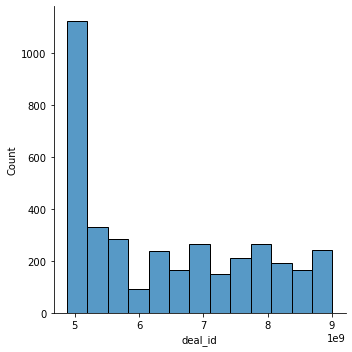

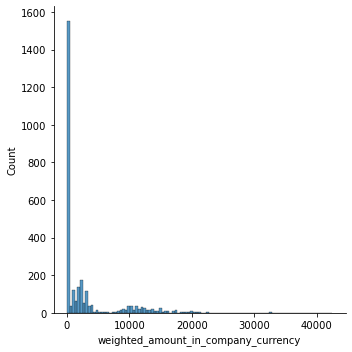

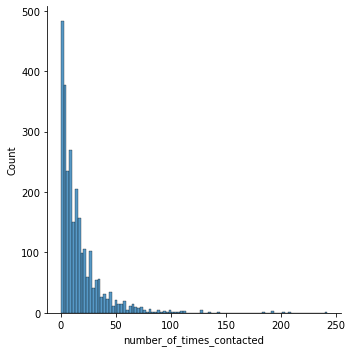

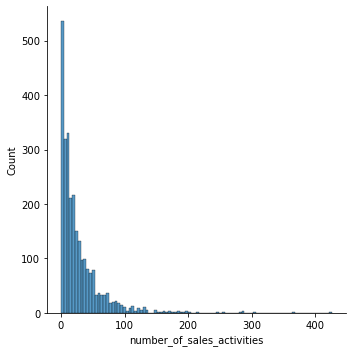

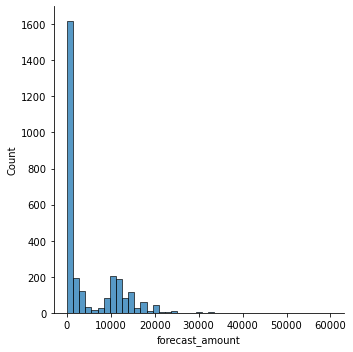

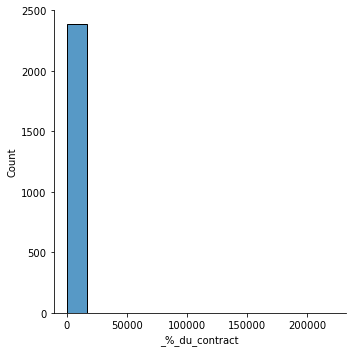

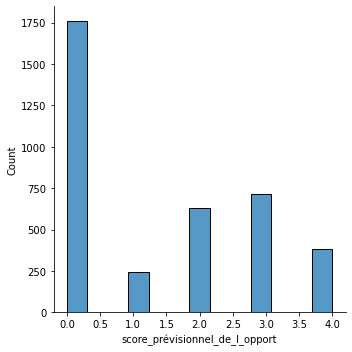

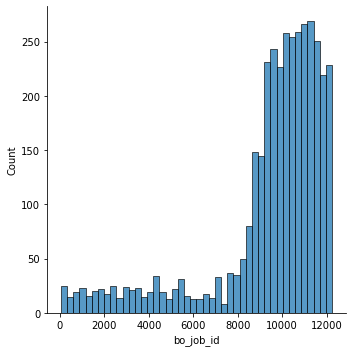

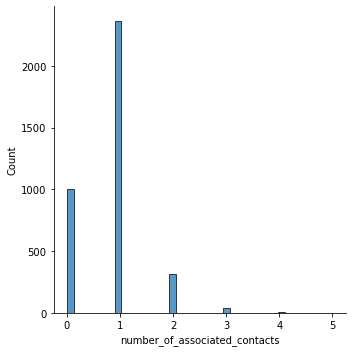

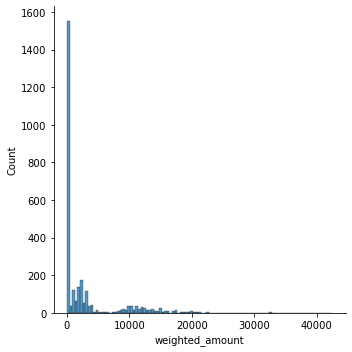

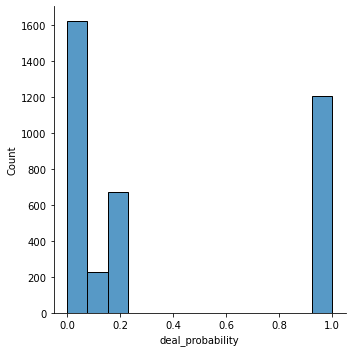

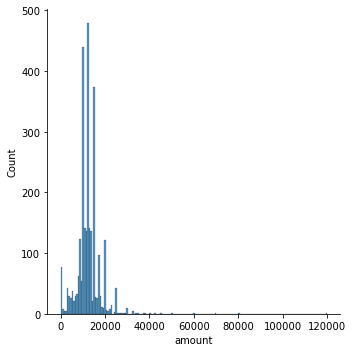

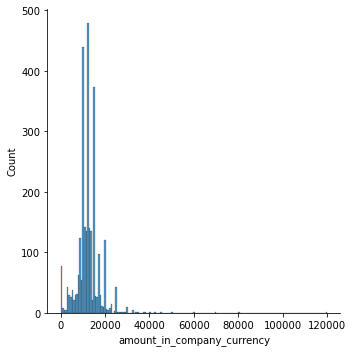

deal_id                                None
weighted_amount_in_company_currency    None
number_of_times_contacted              None
number_of_sales_activities             None
forecast_amount                        None
_%_du_contract                         None
score_prévisionnel_de_l_opport         None
bo_job_id                              None
number_of_associated_contacts          None
weighted_amount                        None
deal_probability                       None
amount                                 None
amount_in_company_currency             None
dtype: object

In [902]:
# Plotting numericals :
def plot_numericals(x) :
    sns.displot(x)
    plt.show()
    
jobs_numericals.apply(plot_numericals)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


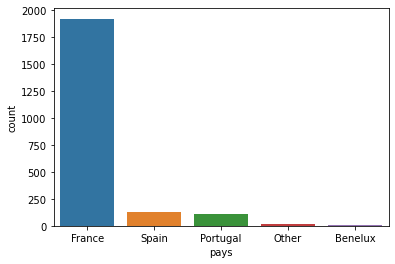

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


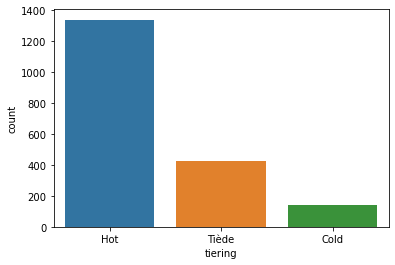

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


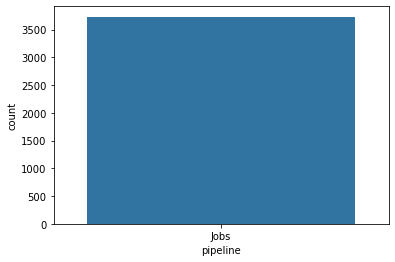

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


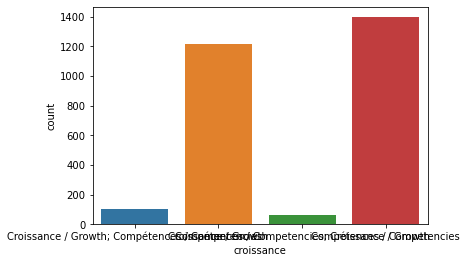

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


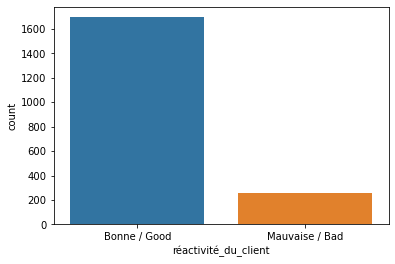

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


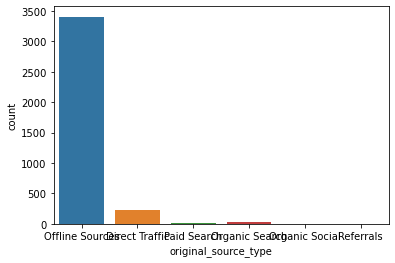

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


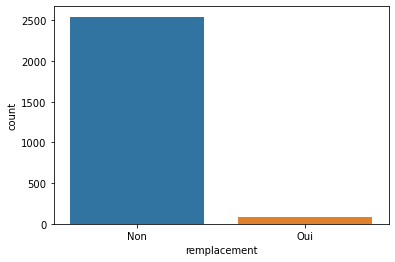

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


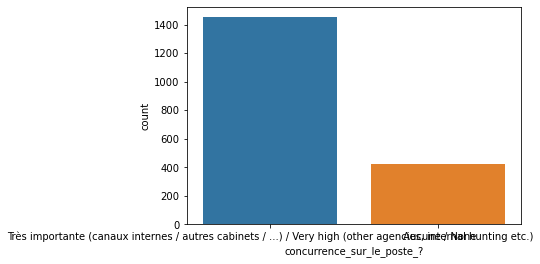

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


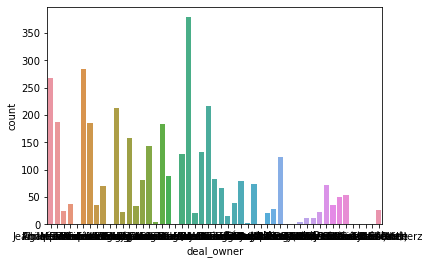

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


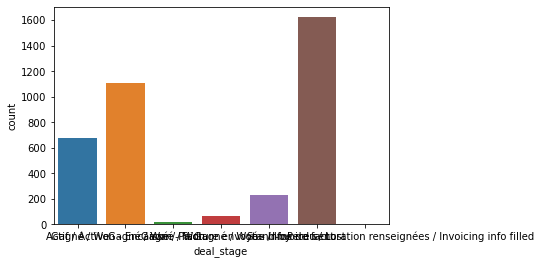

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


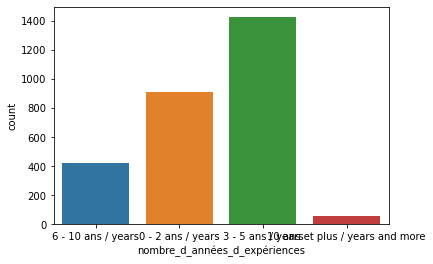

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


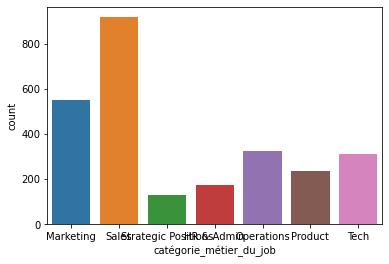

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


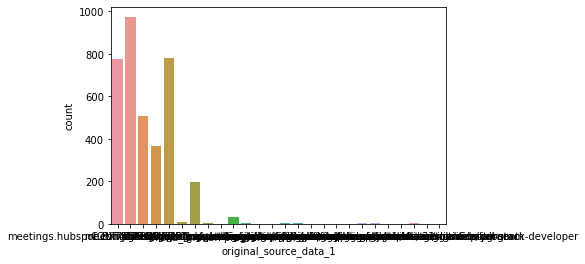

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


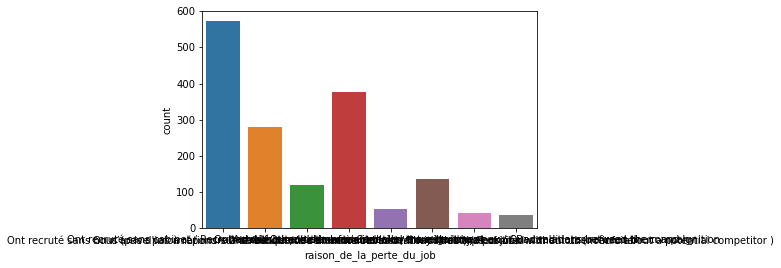

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


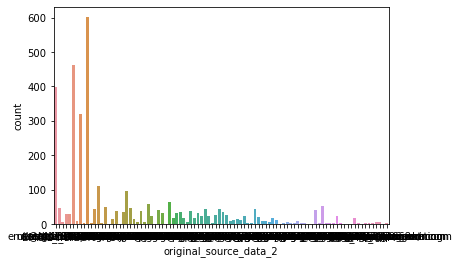

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


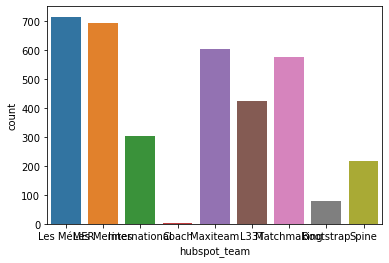

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


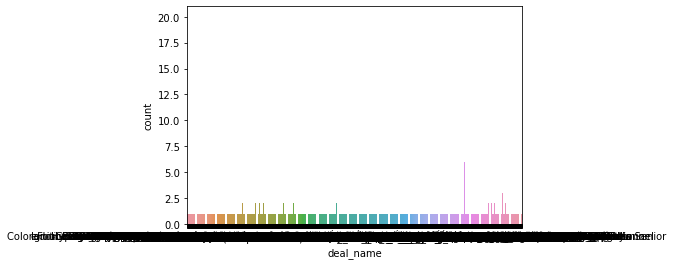

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


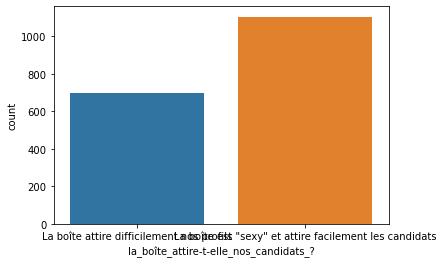

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


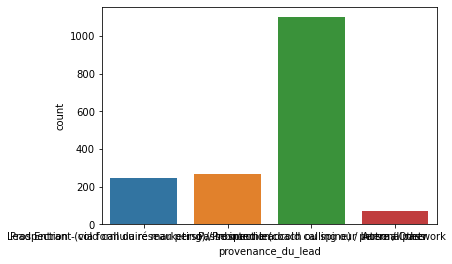

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


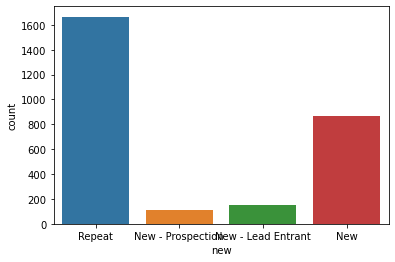

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


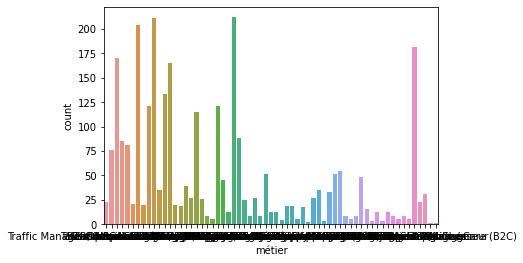

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


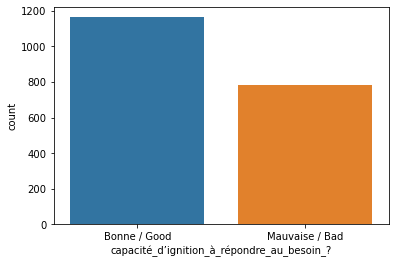

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


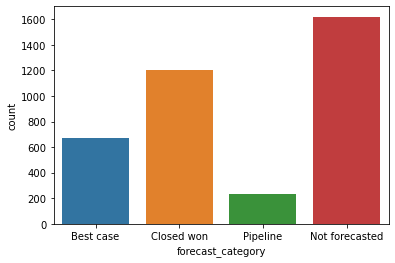

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


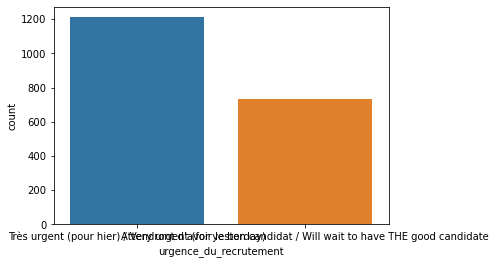

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


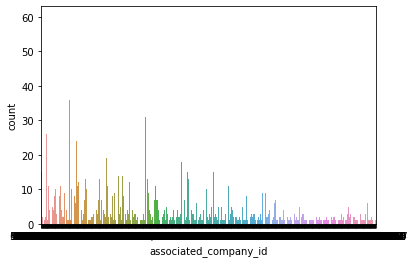

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


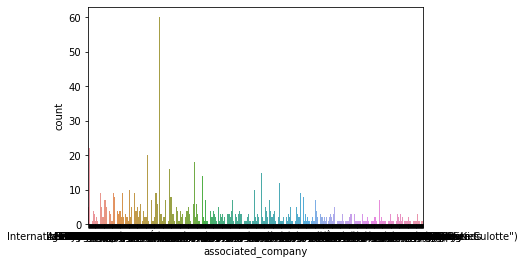

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


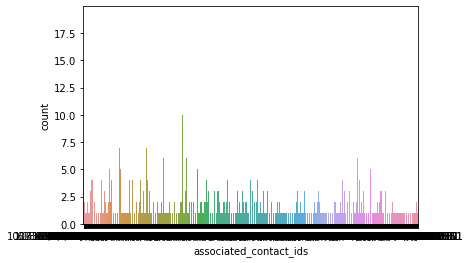

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


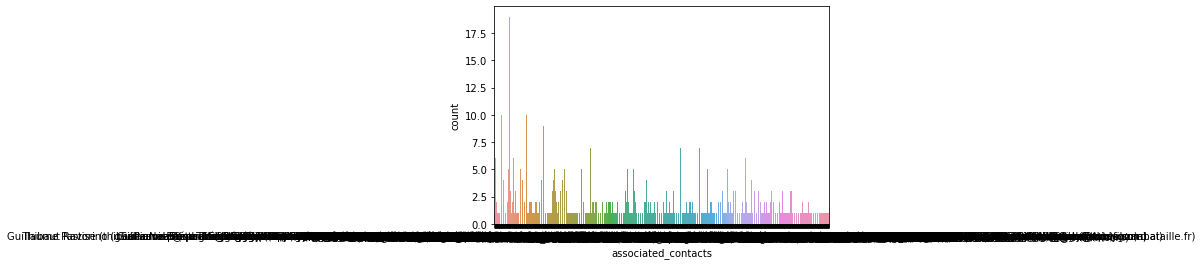

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


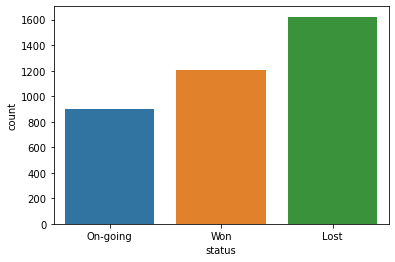

pays                                          None
tiering                                       None
pipeline                                      None
croissance                                    None
réactivité_du_client                          None
original_source_type                          None
remplacement                                  None
concurrence_sur_le_poste_?                    None
deal_owner                                    None
deal_stage                                    None
nombre_d_années_d_expériences                 None
catégorie_métier_du_job                       None
original_source_data_1                        None
raison_de_la_perte_du_job                     None
original_source_data_2                        None
hubspot_team                                  None
deal_name                                     None
la_boîte_attire-t-elle_nos_candidats_?        None
provenance_du_lead                            None
new                            

In [903]:
# plotting categoricals
def plot_categoricals(x) :
    sns.countplot(x)
    plt.show()
    
jobs_categoricals.apply(plot_categoricals)

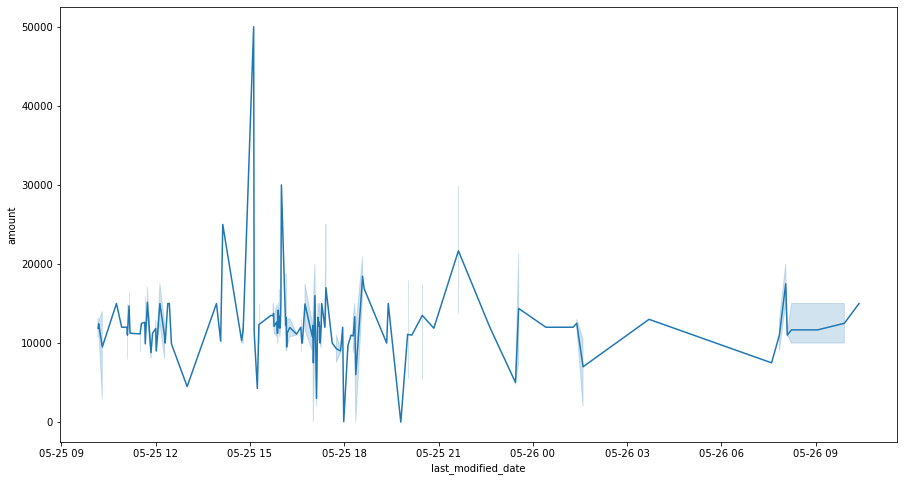

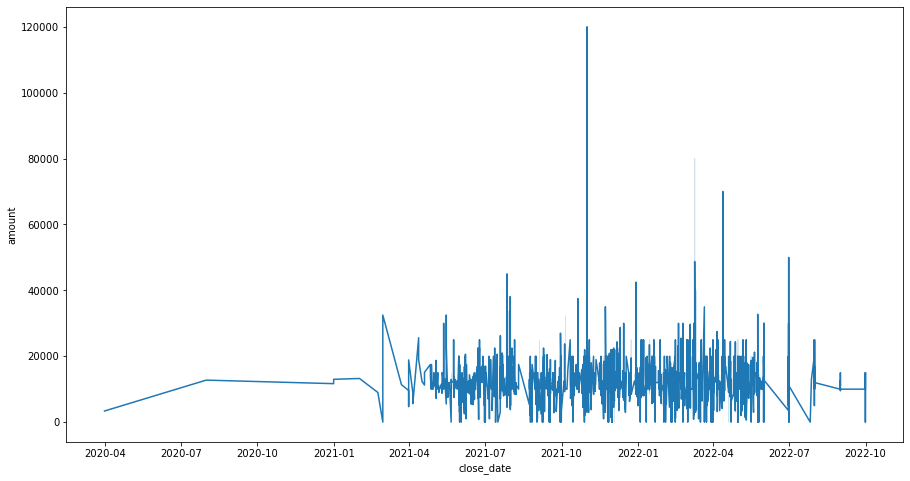

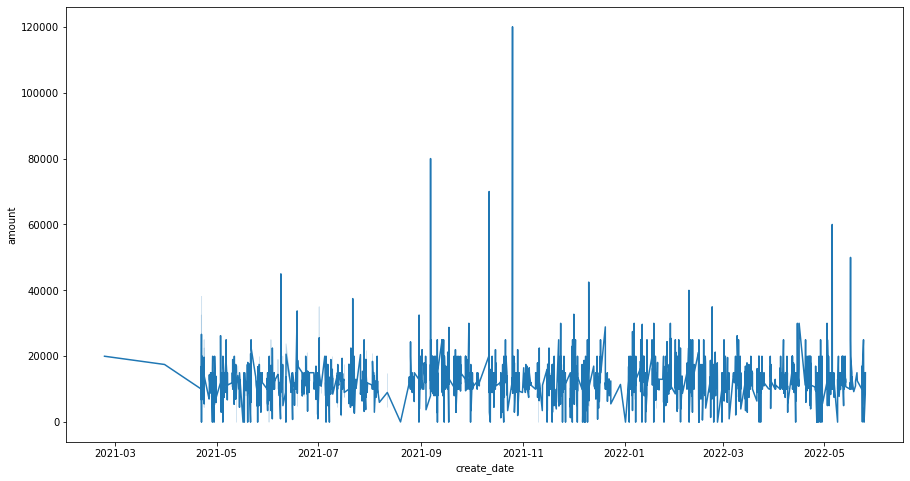

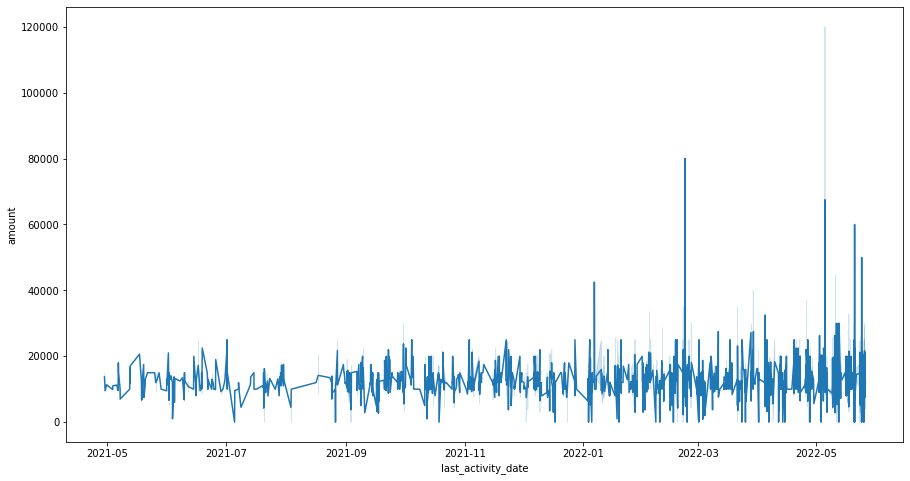

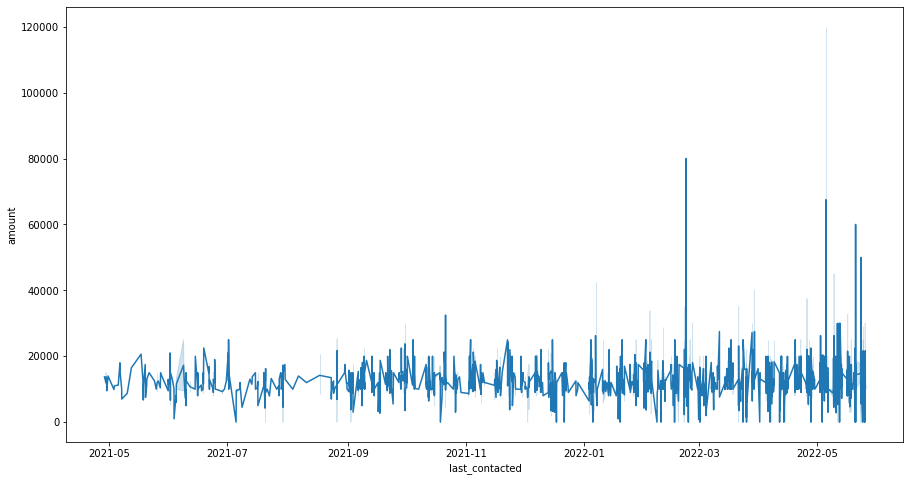

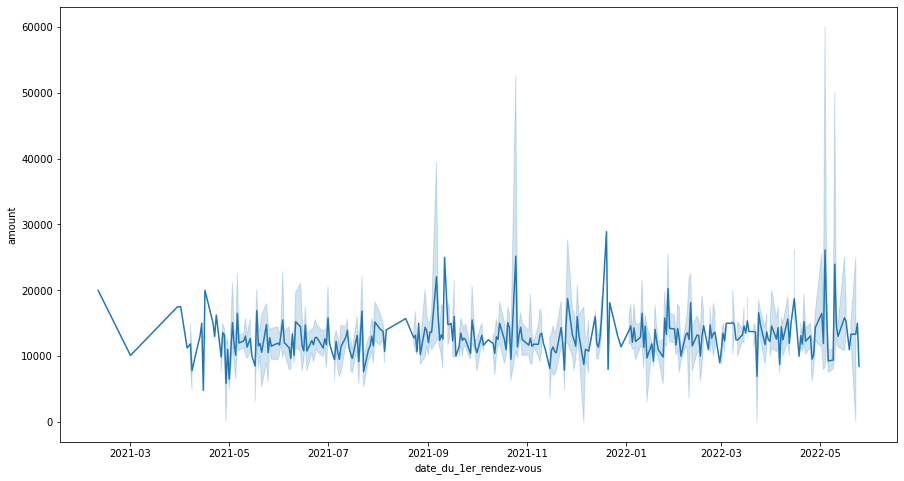

last_modified_date         None
close_date                 None
create_date                None
last_activity_date         None
last_contacted             None
date_du_1er_rendez-vous    None
dtype: object

In [904]:
# plotting Dates
def plot_dates(x) :
    plt.figure(figsize = (15,8))
    sns.lineplot(x = x, y = jobs['amount'], data = jobs)
    plt.show()
    
jobs_dates.apply(plot_dates)

# Data Cleaning - Part 2 : Cleaning Numericals

Some columns give redundant information, let's drop them !

In [905]:
(jobs_numericals.isna().sum())/jobs_numericals.shape[0]

deal_id                                0.000000
weighted_amount_in_company_currency    0.233449
number_of_times_contacted              0.275797
number_of_sales_activities             0.275797
forecast_amount                        0.233449
_%_du_contract                         0.359421
score_prévisionnel_de_l_opport         0.000000
bo_job_id                              0.000000
number_of_associated_contacts          0.000000
weighted_amount                        0.233449
deal_probability                       0.000000
amount                                 0.233449
amount_in_company_currency             0.233449
dtype: float64

In [906]:
# weighted_amount = weighted_amount_in_company_currency (all in €)
# amount = amount_in_company_currency

In [907]:
jobs_numericals = jobs_numericals.drop(['weighted_amount_in_company_currency', 'amount_in_company_currency'], axis = 1)
(jobs_numericals.isna().sum())/jobs_numericals.shape[0]

deal_id                           0.000000
number_of_times_contacted         0.275797
number_of_sales_activities        0.275797
forecast_amount                   0.233449
_%_du_contract                    0.359421
score_prévisionnel_de_l_opport    0.000000
bo_job_id                         0.000000
number_of_associated_contacts     0.000000
weighted_amount                   0.233449
deal_probability                  0.000000
amount                            0.233449
dtype: float64

Let's train a KNN model with KNNImputer to fill the missing values with the closest neighbors. 

In [908]:
# no need for X/y and train/test split because we are not going to create a predictive model.

from sklearn.impute import KNNImputer

X = jobs_numericals
imputer = KNNImputer(n_neighbors=5)
jobs_num_nona = imputer.fit_transform(X)

In [909]:
# Then let's put again this np.array into dataframe
jobs_num_nona = pd.DataFrame(jobs_num_nona, columns = imputer.get_feature_names_out())
jobs_num_nona.head()

,deal_id,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount
0,9.004430e+09,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0
1,9.004015e+09,1.8,4.0,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0
2,9.003734e+09,1.8,4.0,1802.8,25.0,3.0,12239.0,1.0,1226.8,0.2,6134.0
3,9.000719e+09,1.8,4.0,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0
4,9.000825e+09,1.8,4.0,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0


In [910]:
(jobs_num_nona.isna().sum())/jobs_num_nona.shape[0]

deal_id                           0.0
number_of_times_contacted         0.0
number_of_sales_activities        0.0
forecast_amount                   0.0
_%_du_contract                    0.0
score_prévisionnel_de_l_opport    0.0
bo_job_id                         0.0
number_of_associated_contacts     0.0
weighted_amount                   0.0
deal_probability                  0.0
amount                            0.0
dtype: float64

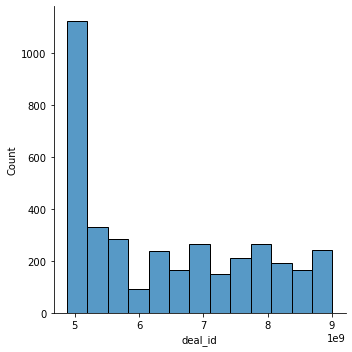

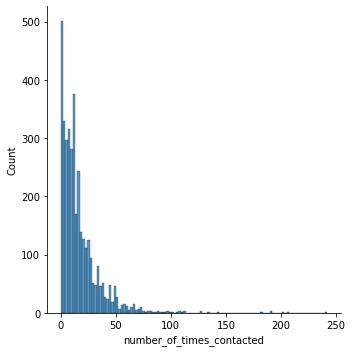

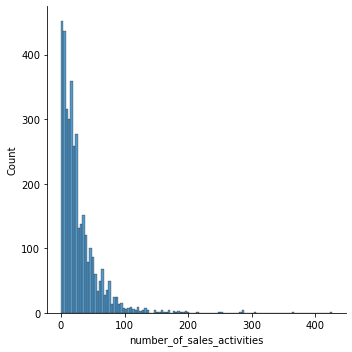

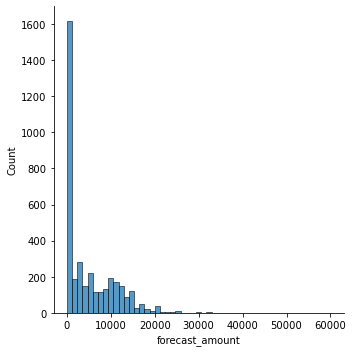

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f96090efaf0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f97cfe6c8b0> (for post_execute):


KeyboardInterrupt: 

In [911]:
# Let's check again the distribution now that NaN are replaced !
#jobs_num_nona.apply(plot_numericals)


In [ ]:
# check outliers
#def plot_outliers(x) :
    #sns.boxplot(x = x)
    #plt.show()
    
#jobs_num_nona.apply(plot_outliers)

In [ ]:
# Example to check further outliers :
# For customer_lifetime_value, with 90% percentiles :
#iqr1 = np.percentile(continuous_df['customer_lifetime_value'],90) - np.percentile(continuous_df['customer_lifetime_value'],10)
#upper_limit1 = np.percentile(continuous_df['customer_lifetime_value'],90) + 1.5*iqr1
#print("Outliers start with the value :", upper_limit1)

#outliers1 = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit1]
#print("The number of outliers for customer_lifetime_value is :", len(outliers1))
#print("In % :", round(len(outliers1)/len(continuous_df)*100,2))


# Data Cleaning - Part 3 : Cleaning Categoricals 

In [912]:
jobs_categoricals.isna().sum()/jobs_categoricals.shape[0]

pays                                          0.414634
tiering                                       0.489413
pipeline                                      0.000000
croissance                                    0.256500
réactivité_du_client                          0.476548
original_source_type                          0.012597
remplacement                                  0.296435
concurrence_sur_le_poste_?                    0.496918
deal_owner                                    0.000268
deal_stage                                    0.000000
nombre_d_années_d_expériences                 0.243902
catégorie_métier_du_job                       0.291343
original_source_data_1                        0.012597
raison_de_la_perte_du_job                     0.565800
original_source_data_2                        0.075315
hubspot_team                                  0.030019
deal_name                                     0.000000
la_boîte_attire-t-elle_nos_candidats_?        0.517288
provenance

First, let's drop the columns we don't need :

In [913]:
jobs_categoricals = jobs_categoricals.drop(['pipeline', 'deal_name', 'associated_contact_ids', 'associated_contacts'], axis = 1)

# for the moment, questionmark on deal_owner

In [914]:
# Let's have a closer look at redundant information :
print(jobs_categoricals['original_source_type'].value_counts())

print(jobs_categoricals['original_source_data_1'].value_counts())

print(jobs_categoricals['original_source_data_2'].value_counts())

# Let's drop original_source_data_1 and original_source_data_2

Offline Sources    3403
Direct Traffic      230
Organic Search       31
Paid Search          14
Organic Social        4
Referrals             2
Name: original_source_type, dtype: int64
EXTENSION                                                                       974
IMPORT                                                                          782
CONTACTS                                                                        775
SALES                                                                           507
INTEGRATION                                                                     365
meetings.hubspot.com/ignition-program/call-recrutement-ignition-program         197
Unknown keywords (SSL)                                                           31
meetings.hubspot.com/antoine-welgan                                               7
fr - txt - g - startups - sourcing candidat                                       5
ignition-program.com/                                      

In [915]:
jobs_categoricals = jobs_categoricals.drop(['original_source_data_1', 'original_source_data_2'], axis = 1)

In [916]:
print(jobs_categoricals['deal_stage'].value_counts())

print(jobs_categoricals['status'].value_counts())

# Let's drop deal_stage

Perdu / Lost                                                              1623
Gagné / Won - Encaissé / Paid                                             1112
Actif / Active                                                             674
Stand-by                                                                   228
Gagné / Won - Facture envoyée / Invoice sent                                67
Gagné / Won                                                                 20
Gagné / Won - Infos de facturation renseignées / Invoicing info filled       7
Name: deal_stage, dtype: int64
Lost        1623
Won         1206
On-going     902
Name: status, dtype: int64


In [917]:
jobs_categoricals = jobs_categoricals.drop(['deal_stage'], axis = 1)

In [939]:
# Métier and Catégorie_métier are redundant too : let's drop métier which has too many value options
jobs_categoricals = jobs_categoricals.drop(['métier'], axis = 1)

Now let's clean one by one and diminishing the options for each variable

In [918]:
jobs_categoricals.isna().sum()/jobs_categoricals.shape[0]

pays                                          0.414634
tiering                                       0.489413
croissance                                    0.256500
réactivité_du_client                          0.476548
original_source_type                          0.012597
remplacement                                  0.296435
concurrence_sur_le_poste_?                    0.496918
deal_owner                                    0.000268
nombre_d_années_d_expériences                 0.243902
catégorie_métier_du_job                       0.291343
raison_de_la_perte_du_job                     0.565800
hubspot_team                                  0.030019
la_boîte_attire-t-elle_nos_candidats_?        0.517288
provenance_du_lead                            0.549451
new                                           0.249799
métier                                        0.226749
capacité_d’ignition_à_répondre_au_besoin_?    0.477620
forecast_category                             0.000000
urgence_du

In [919]:
jobs_categoricals['pays'].value_counts()

France      1922
Spain        124
Portugal     113
Other         13
Benelux       12
Name: pays, dtype: int64

In [920]:
def clean_pays(x) :
    if x in ['Spain', 'Portugal', 'Benelux', 'Other'] :
        return 'International'
    else :
        return x

jobs_categoricals.pays = jobs_categoricals.pays.apply(clean_pays)
jobs_categoricals.pays.value_counts(dropna = False)

France           1922
NaN              1547
International     262
Name: pays, dtype: int64

In [921]:
jobs_categoricals['croissance'].value_counts()

Compétences / Competencies                         1396
Croissance / Growth                                1216
Croissance / Growth; Compétences / Competencies     101
Compétences / Competencies; Croissance / Growth      61
Name: croissance, dtype: int64

In [922]:
def clean_croissance(x) :
    if x in ['Croissance / Growth; Compétences / Competencies'] :
        return 'Croissance / Growth'
    elif x in ['Compétences / Competencies; Croissance / Growth'] :
        return 'Compétences / Competencies'
    else :
        return x

jobs_categoricals.croissance = jobs_categoricals.croissance.apply(clean_croissance)
jobs_categoricals.croissance.value_counts(dropna = False)

Compétences / Competencies    1457
Croissance / Growth           1317
NaN                            957
Name: croissance, dtype: int64

In [923]:
jobs_categoricals['original_source_type'].value_counts()

Offline Sources    3403
Direct Traffic      230
Organic Search       31
Paid Search          14
Organic Social        4
Referrals             2
Name: original_source_type, dtype: int64

In [924]:
def clean_source_type(x) :
    if x in ['Direct Traffic', 'Organic Search', 'Paid Search', 'Organic Social', 'Referrals'] :
        return 'Online Sources'
    else :
        return x

jobs_categoricals.original_source_type = jobs_categoricals.original_source_type.apply(clean_source_type)
jobs_categoricals.original_source_type.value_counts(dropna = False)

Offline Sources    3403
Online Sources      281
NaN                  47
Name: original_source_type, dtype: int64

In [925]:
jobs_categoricals['nombre_d_années_d_expériences'].value_counts()

3 - 5 ans / years                  1426
0 - 2 ans / years                   913
6 - 10 ans / years                  423
10 ans et plus / years and more      59
Name: nombre_d_années_d_expériences, dtype: int64

In [926]:
def clean_experience(x) :
    if x in ['6 - 10 ans / years', '10 ans et plus / years and more'] :
        return 'Senior : 6 years and more'
    elif x in ['3 - 5 ans / years'] :
        return 'Medium : 3 to 5 years'
    elif x in ['0 - 2 ans / years'] :
        return 'Junior : 0 to 2 years'
    else :
        return x

jobs_categoricals.nombre_d_années_d_expériences = jobs_categoricals.nombre_d_années_d_expériences.apply(clean_experience)
jobs_categoricals.nombre_d_années_d_expériences.value_counts(dropna = False)

Medium : 3 to 5 years        1426
Junior : 0 to 2 years         913
NaN                           910
Senior : 6 years and more     482
Name: nombre_d_années_d_expériences, dtype: int64

In [927]:
jobs_categoricals['catégorie_métier_du_job'].value_counts()
# I keep it as it is, info are valuable

Sales                  917
Marketing              549
Operations             326
Tech                   310
Product                238
HR & Admin             174
Strategic Positions    130
Name: catégorie_métier_du_job, dtype: int64

In [931]:
jobs_categoricals['raison_de_la_perte_du_job'].value_counts()

Ont recruté sans cabinet / Recruited without external recruiter                                                                                                572
Ont annulé le recrutement / Canceled the recruitment                                                                                                           376
Autre / Other                                                                                                                                                  281
Ont recruté avec un autre cabinet / They filled the position with an other recruiter                                                                           136
On n’arrive pas à répondre à ce besoin / We are not able to deal with this type of jobs                                                                        121
Ont recruté sans nous (pas d'informations sur le fait que ce soit ou non avec un concurrent) / Recruited without us (no info about a potential competitor )     54
Nos candidats refusent

In [930]:
def clean_reason_loss(x) :
    if 'recruté' in x :
        return 'Recruited without us'
    elif x in ['Ont annulé le recrutement / Canceled the recruitment', 'On n’arrive pas à répondre à ce besoin / We are not able to deal with this type of jobs'] :
        return 'Recruitment canceled / mismatch'
    elif x in ['Nos candidats refusent d’aller travailler chez eux / Our candidates refused the company', 'Mauvaise relation entre Ignition et eux / Bad relations between them and Ignition'] :
        return 'Bad client'
    else :
        return x

jobs_categoricals.raison_de_la_perte_du_job = jobs_categoricals.raison_de_la_perte_du_job.apply(clean_reason_loss)
jobs_categoricals.raison_de_la_perte_du_job.value_counts(dropna = False)

TypeError: argument of type 'float' is not iterable

In [932]:
jobs_categoricals['hubspot_team'].value_counts()

Les MéMER        716
Les Merines      693
Maxiteam         605
Matchmaking      576
L33T             425
International    303
Spine            219
Bootstrap         79
Coach              3
Name: hubspot_team, dtype: int64

In [933]:
def clean_team(x) :
    if x in ['Spine', 'Bootstrap', 'Coach'] :
        return 'Other teams'
    else :
        return x

jobs_categoricals.hubspot_team = jobs_categoricals.hubspot_team.apply(clean_team)
jobs_categoricals.hubspot_team.value_counts(dropna = False)

Les MéMER        716
Les Merines      693
Maxiteam         605
Matchmaking      576
L33T             425
International    303
Other teams      301
NaN              112
Name: hubspot_team, dtype: int64

In [936]:
jobs_categoricals['new'].value_counts()

Repeat                1666
New                    870
New - Lead Entrant     150
New - Prospection      113
Name: new, dtype: int64

In [937]:
def clean_new(x) :
    if x in ['New', 'New - Lead Entrant', 'New - Prospection'] :
        return 'New'
    else :
        return x

jobs_categoricals.new = jobs_categoricals.new.apply(clean_new)
jobs_categoricals.new.value_counts(dropna = False)

Repeat    1666
New       1133
NaN        932
Name: new, dtype: int64

In [941]:
jobs_categoricals['forecast_category'].value_counts()

# What does it mean ???? Drop ?

Not forecasted    1619
Closed won        1207
Best case          675
Pipeline           230
Name: forecast_category, dtype: int64

Let's train a KNN model with KNNImputer to fill the missing values with the closest neighbors. 

In [ ]:
# To do that I first need to dummify my categorical variables
# Last but not least, I'll be able to use KNN method

In [727]:
from sklearn.impute import KNNImputer

X = jobs
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(X)


ValueError: could not convert string to float: 'France'

We are going to take columns one by one to decide what to do with missing values in each column

In [608]:
# METHOD 3 : .loc -> how to put it into function ?
crm_deals.loc[(crm_deals['pays'].isna() == True) & (crm_deals['hubspot_team'] != 'International'), 'pays'] = "France"
crm_deals.loc[(crm_deals['pays'].isna() == True) & crm_deals['deal_owner'].isin(['Bruna Maia', 'Cécile Roger', 'Vera Cunha']), 'pays'] = "Portugal"
crm_deals.loc[(crm_deals['pays'].isna() == True) & crm_deals['deal_owner'].isin(['Marta Egídio', 'María Segura', 'Gabriela Cansinos']),'pays'] = "Spain"

In [609]:
crm_deals['pays'].value_counts(dropna = False)

France      6689
Portugal     240
Spain        163
Other         13
Benelux       12
Name: pays, dtype: int64

In [612]:
crm_deals.loc[(crm_deals['status'] == 'Lost') & (crm_deals['tiering'].isna() == True), 'tiering'] = "Cold"
crm_deals.loc[(crm_deals['status'] == 'Won') & (crm_deals['tiering'].isna() == True), 'tiering'] = "Hot"
crm_deals['tiering'] = crm_deals['tiering'].fillna('Unknown')

    
crm_deals['tiering'].value_counts(dropna = False)

Hot        3755
Cold       1695
Unknown     865
Tiède       802
Name: tiering, dtype: int64

In [640]:
# Let's clean the rest : 
def clean_contract(x) :
    if x != 25.0 :
        return "special contract"
    else : 
        return "25%"

In [641]:
crm_deals['_%_du_contract'] = list(map(clean_contract, crm_deals['_%_du_contract']))
crm_deals['_%_du_contract'].value_counts(dropna = False)

25%                 6562
special contract     555
Name: _%_du_contract, dtype: int64

In [ ]:
# Then we need to group values from different columns into one new column :
new_col = []
for i in range(len(pokemon['Type 2'])):
    if pd.isna(pokemon['Type 2'][i]) == False :
        new_col.append(str(pokemon['Type 1'][i]) + "-" + str(pokemon['Type 2'][i]))
    else : 
        new_col.append(str(pokemon['Type 1'][i]))
        
# raison_de_la_perte_du_job & raison_de_la_perte_du_deal

In [24]:
# Splitting our dataframes into pipeline dataframes :
#crm_deals.pipeline.unique()

# Here we will group : 
# convention de recrutement + account management 
# spineup + accompagnement RH
# then jobs, scan RH and club bootstrap will be separated dataframes

array(['Convention de recrutement / Recruitment contract', 'Scan RH',
       'Jobs', 'SpineUp', 'Accompagnement RH', 'Club Bootstrap',
       'Account Management'], dtype=object)